# 聚类

###### 1、Kmeans

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [183]:
data = pd.read_csv('Unlabeled.csv')
#把时间转化成时间戳
import time
data.describe()
for i in range(len(data['date'])):
    dt = data.loc[i,'date']
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    data.loc[i,'date']=timestamp
X = data.drop('location', axis=1)#X为包含14个特征值的矩阵

In [184]:
scale = MinMaxScaler().fit(X) # 训练规则
X_dataScale = scale.transform(X) # 应用规则
kmeans = KMeans(n_clusters=3,random_state=123).fit(X_dataScale) # 构建并训练模型
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

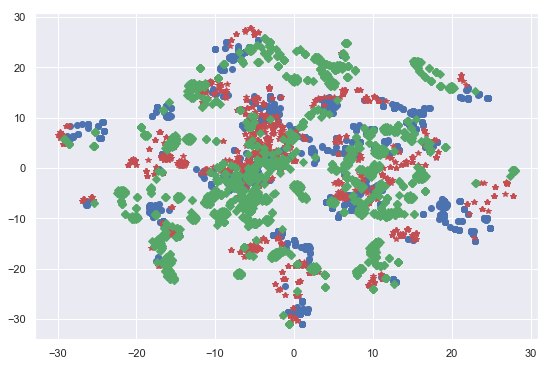

In [185]:
'''  聚类结果可视化  '''
tsne = TSNE(n_components=3,init='random',random_state=100).fit(X) #使用TSNE进行数据降维，降成三维
data = pd.DataFrame(tsne.embedding_)# 将原始数据转换为DataFrame
data['labels'] = kmeans.labels_     # 将聚类结果存储进data数据表中
data1 = data[data['labels']==0]
data2 = data[data['labels']==1]
data3 = data[data['labels']==2]
fig = plt.figure(figsize=(9,6))    # 绘制图形  设定空白画布，并制定大小
plt.plot(data1[0],data1[1],'bo',data2[0],data2[1],'r*',data3[0],data3[1],'gD')
plt.show()                          # 显示图片

In [170]:
type(data)

pandas.core.frame.DataFrame

##### 2、DBScan

In [186]:
from sklearn import datasets  
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
data = pd.read_csv('Unlabeled.csv')
data = pd.read_csv('Unlabeled.csv')
#把时间转化成时间戳
import time
data.describe()
for i in range(len(data['date'])):
    dt = data.loc[i,'date']
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    data.loc[i,'date']=timestamp
X = data.drop('location', axis=1)#X为包含14个特征值的矩阵
X=X.values

In [187]:
scale = MinMaxScaler().fit(X) # 训练规则
X_dataScale = scale.transform(X) # 应用规则
dbscan = DBSCAN(eps=0.5,min_samples=3).fit(X)#构造聚类器,一个参数是半径，一个是密度
labels = dbscan.labels_ #获取聚类标签
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#获取聚类所得簇数
n_noise_ = list(labels).count(-1)#获取噪点数
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

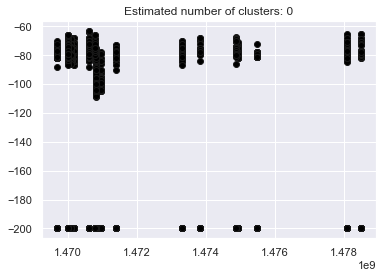

In [188]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##### 3、GMM

In [189]:
from sklearn import datasets  
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()
data = pd.read_csv('Unlabeled.csv')
import time
data.describe()
for i in range(len(data['date'])):
    dt = data.loc[i,'date']
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    data.loc[i,'date']=timestamp
X = data.drop('location', axis=1)#X为包含14个特征值的矩阵
X=X.values

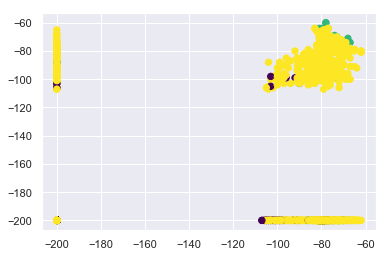

In [190]:
gmm = GaussianMixture(n_components=4).fit(X)
tsne = TSNE(n_components=3,init='random',random_state=100).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=labels, s=40, cmap='viridis');

##### 4、层次聚类

In [198]:
from sklearn import datasets  
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns; sns.set()
data = pd.read_csv('Unlabeled.csv')
import time
data.describe()
for i in range(len(data['date'])):
    dt = data.loc[i,'date']
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    data.loc[i,'date']=timestamp
X = data.drop('location', axis=1)#X为包含14个特征值的矩阵
X=X.values
#type(X)

In [204]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, compute_full_tree=True,affinity='euclidean', linkage='complete').fit(X)

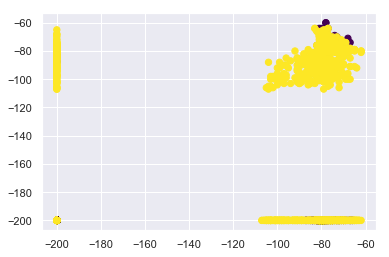

In [208]:
tsne = TSNE(n_components=3,init='random',random_state=100).fit(X)
labels = clustering.fit_predict(X)
plt.scatter(X[:, 2], X[:, 3], c=labels, s=40, cmap='viridis');